#  Influence line support reaction A

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some influence lines!

![figuur 1](../data_interactive_influence_line_simple/Structure_simple.gif)

In [ ]:
import micropip
await micropip.install("ipympl")

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

%matplotlib widget

In [2]:
EI, x = sym.symbols('EI, x',real=True)

In [3]:
Av, Bv = sym.symbols('Av, Bv',real=True)
a, L= sym.symbols('a, L ',positive=True,real=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

In [4]:
q = -Bv * sym.SingularityFunction(x,L,-1) - Av * sym.SingularityFunction(x,0,-1) + 1 * sym.SingularityFunction(x,a,-1)
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3
w = - sym.integrate(phi,x)+C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L),0)
eq3 = sym.Eq(M.subs(x,0),0)
eq4 = sym.Eq(M.subs(x,L),0)
eq5 = sym.Eq(V.subs(x,-1),0)
eq6 = sym.Eq(V.subs(x,L+1),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Bv])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L,5),(a,2),(EI,5000)])
V_numpy = sym.lambdify([L,a,EI,x],V_sol.rewrite(sym.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L,5),(a,2),(EI,5000)])
M_numpy = sym.lambdify([L,a,EI,x],M_sol.rewrite(sym.Piecewise))
Av_sol = sol[Av].rewrite(sym.Piecewise)
Av_numpy = sym.lambdify([L,a,EI],Av_sol)
Bv_sol = sol[Bv].rewrite(sym.Piecewise)
Bv_numpy = sym.lambdify([L,a,EI],Bv_sol)

interactive(children=(FloatSlider(value=2.0, description='Location unit load x_F = ... (m)', layout=Layout(wid…

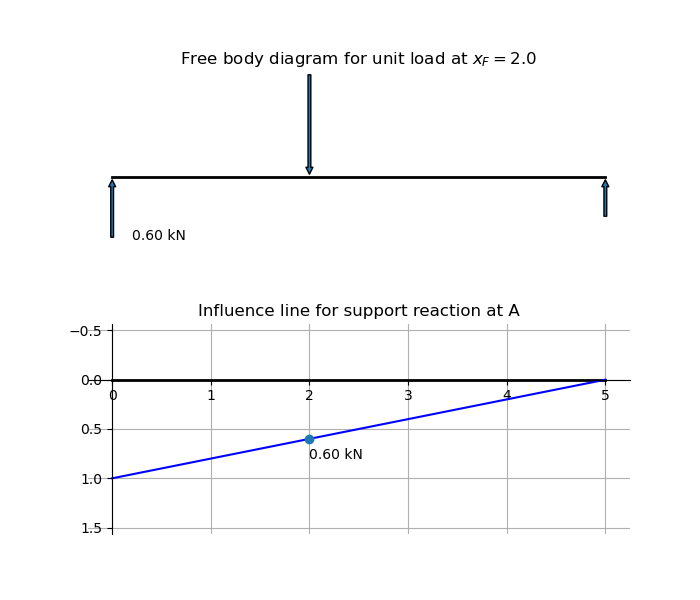

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))
x = np.linspace(0,5,2)
def func(b):
    axs[0].clear()  # Clear the existing plot
    axs[1].clear()
    
    axs[0].plot([0,5],[0,0],color='black',linewidth=2)
    #axs[0].grid()
    axs[0].annotate(text='', xy=(0,0), xytext=(0,Av_numpy(5,b,5000)), arrowprops=dict(arrowstyle='simple'))
    axs[0].annotate('%.2f kN' % Av_numpy(5,b,5000),xy = [0.2,Av_numpy(5,b,5000)])
    axs[0].annotate(text='', xy=(5,0), xytext=(5,Bv_numpy(5,b,5000)), arrowprops=dict(arrowstyle='simple'))
    #axs[0].annotate('%.2f kN' % Bv_numpy(5,b,5000),xy = [4.3,0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].set_ylim([-1,1])
    axs[0].invert_yaxis()
    axs[0].axis('off')
    title0 = 'Free body diagram for unit load at $x_F = '+str(b)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,5],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,Av_numpy(5,x,5000),color='blue')
    axs[1].plot(b,Av_numpy(5,b,5000),marker='o')
    axs[1].annotate('%.2f kN' % Av_numpy(5,b,5000),xy = [b,Av_numpy(5,b,5000)+0.2])
    axs[1].invert_yaxis()
    title1 = 'Influence line for support reaction at A'
    axs[1].set_title(title1)

    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_position('zero')
    plt.draw()  

    
interact(func, b = widgets.FloatSlider(min=0, max=5, value=2, step=0.1, description="Location unit load x_F = ... (m)",readout_format='.1f',style= {'description_width': '200px'},layout = {'width': '400px'}) );